In [16]:
!pip install seaborn

## Importing and reading in CSV data

Here, I am importing Pandas, Numpy, and Seaborn to help with my data analysis. I am reading in the .CSV file, converted from .JSON, containing Twitter metrics gathered using the Twitter API. Using df.head(), I print the first 5 rows. I collected data for posts in the hashtag #Zelda spanning 10 days from 9/8/22-9/18/22, and was especially interested to how the metrics fluctuated with Nintendo's announcement of the title of the new Zelda game on 9/13/22.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/Users/melaniehuynh/Downloads/zelda_search_data.csv')

In [18]:
df.head()

,public_metrics/retweet_count,public_metrics/reply_count,public_metrics/like_count,public_metrics/quote_count,text,id,created_at
0,3686,43,17384,19,Ocarina of Time. \nAnimated Wallpaper next wee...,1567905748990009345,2022-09-08
1,38,6,394,1,Anju - Beach Edition (WIP). #Zelda \n\nThe end...,1567991422120529921,2022-09-08
2,4,0,32,0,Moments with sun.... 🙂🐾\n#Zelda #DogsofTwittte...,1567913501515218944,2022-09-08
3,4,1,51,0,Someone is hiding....😉🙂🐾\n#Zelda #DogsofTwittt...,1567959405706022919,2022-09-08
4,9,2,89,0,Working on some cool #animation stuff\n\nBeen ...,1567673417586905089,2022-09-08


Using the collected data, I am checking to see if the below Python commands are returning the right data values.

In [19]:
print(len(df))

55


In [20]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
df['public_metrics/retweet_count']

0     3686
1       38
2        4
3        4
4        9
5      254
6       51
7       10
8       41
9       20
10      17
11      17
12       2
13      16
14       8
15     504
16     279
17       6
18      11
19     292
20     127
21     230
22      95
23     192
24      20
25    2180
26    3629
27     315
28     338
29    1974
30    1782
31     502
32     518
33      40
34      90
35      36
36      42
37      60
38      17
39      87
40     520
41      74
42      84
43     143
44      15
45     532
46      55
47      43
48      28
49      30
50     266
51     383
52      97
53      50
54      22
Name: public_metrics/retweet_count, dtype: int64

In [22]:
df['public_metrics/retweet_count'][30]

1782

In [23]:
for col in df.columns:
    print(col, type(df[col][0]))

public_metrics/retweet_count <class 'numpy.int64'>
public_metrics/reply_count <class 'numpy.int64'>
public_metrics/like_count <class 'numpy.int64'>
public_metrics/quote_count <class 'numpy.int64'>
text <class 'str'>
id <class 'numpy.int64'>
created_at <class 'str'>


Here I am using df.describe() to analyze the data and return calculations regarding the Twitter metrics - mean, standard deviation, min, max, etc.

In [24]:
df.describe()

,public_metrics/retweet_count,public_metrics/reply_count,public_metrics/like_count,public_metrics/quote_count,id
count,55.000000,55.000000,55.000000,55.000000,5.500000e+01
mean,361.545455,10.636364,1961.745455,7.163636,1.569727e+18
std,788.539433,19.093691,4116.524133,29.215523,1.157262e+15
min,2.000000,0.000000,30.000000,0.000000,1.567673e+18
25%,20.000000,1.000000,110.000000,0.000000,1.568688e+18
50%,60.000000,4.000000,394.000000,1.000000,1.569714e+18
75%,285.500000,10.000000,1773.500000,3.500000,1.570725e+18
max,3686.000000,99.000000,17384.000000,214.000000,1.571646e+18


## Visualizing the Data

The two plots below show the distribution of the number of retweets and number of replies, respectively.

Text(0.5, 0, 'Retweet Count')

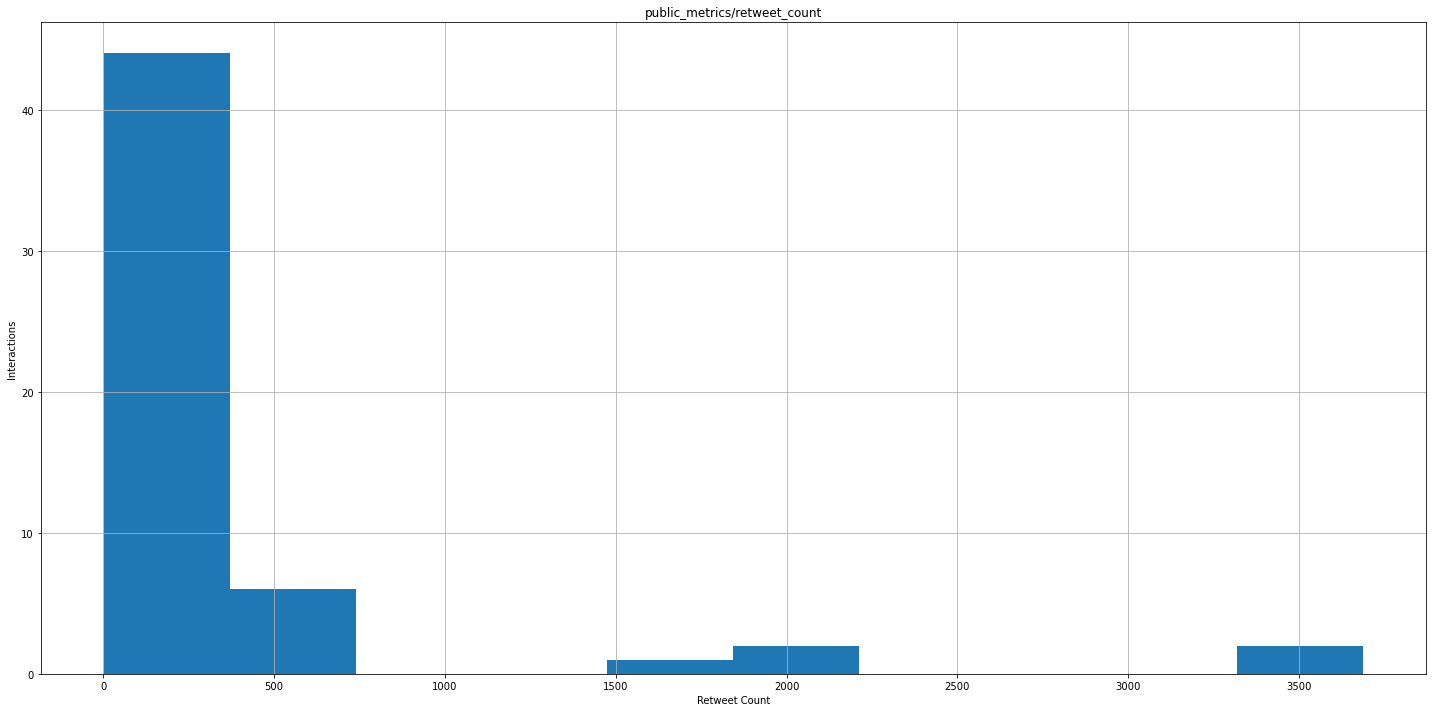

In [29]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.rcParams["figure.figsize"] = (20,10)

df.hist(column='public_metrics/retweet_count')
plt.ylabel('Interactions')
plt.xlabel("Retweet Count")


Text(0.5, 0, 'Reply Count')

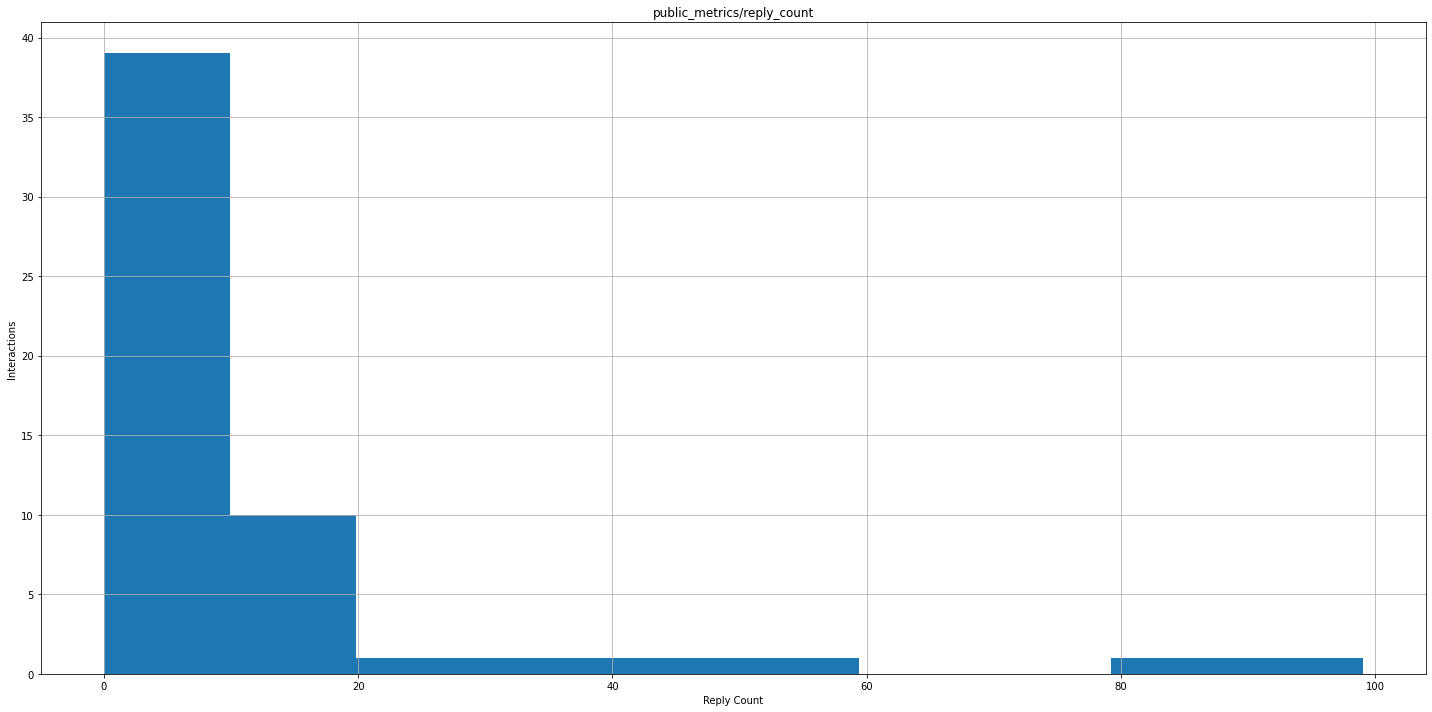

In [30]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

df.hist(column='public_metrics/reply_count')
plt.ylabel('Interactions')
plt.xlabel("Reply Count")

Using seaborn, I created a scatterplot to visualize the amount of replies given to five of the "Top" posts under the Twitter search for each day, starting at 9/08 and ending at 9/18.

[Text(0.5, 1.0, 'Replies per Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Reply Count')]

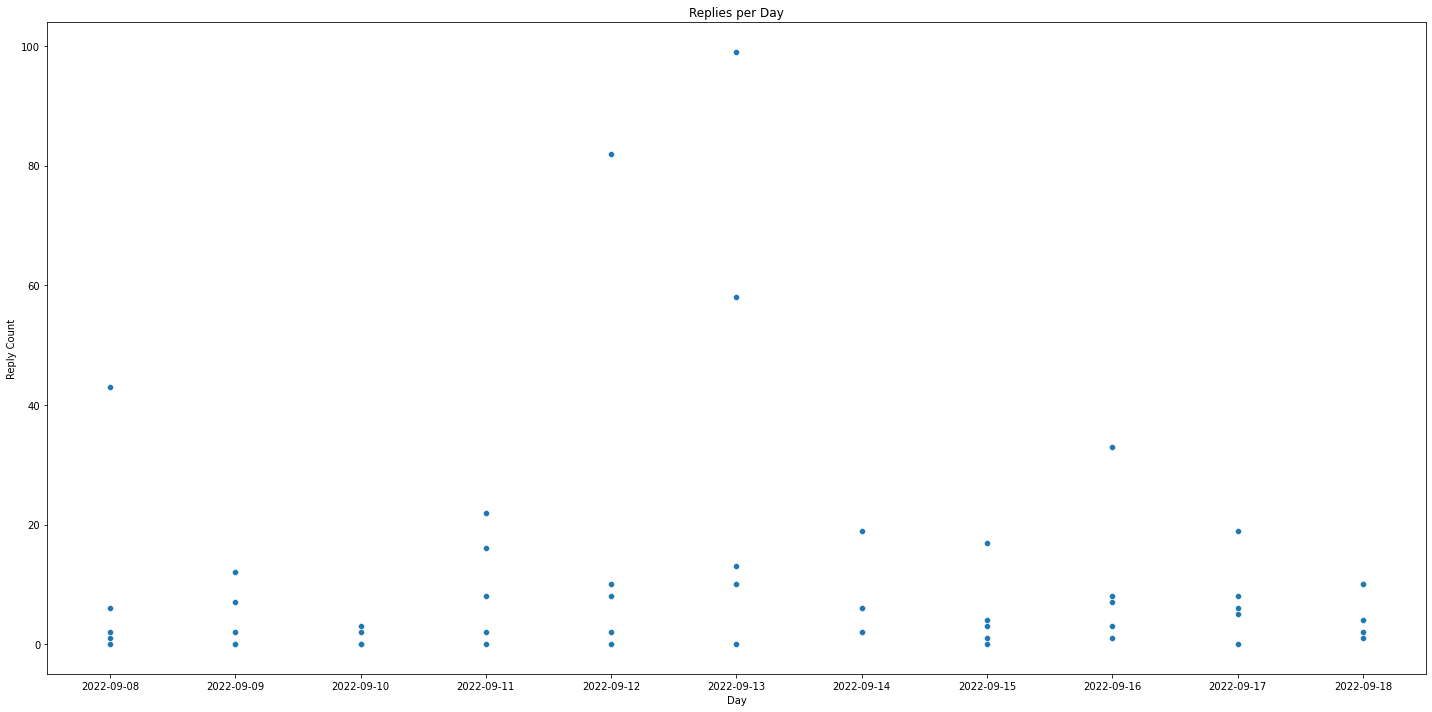

In [31]:
import seaborn
res = seaborn.scatterplot(data = df, x = "created_at", y = "public_metrics/reply_count")
res.set(title='Replies per Day', xlabel='Day', ylabel='Reply Count')

Here I created a plot to display the amount of retweets per post.

Text(0.5, 0, 'Retweet Count')

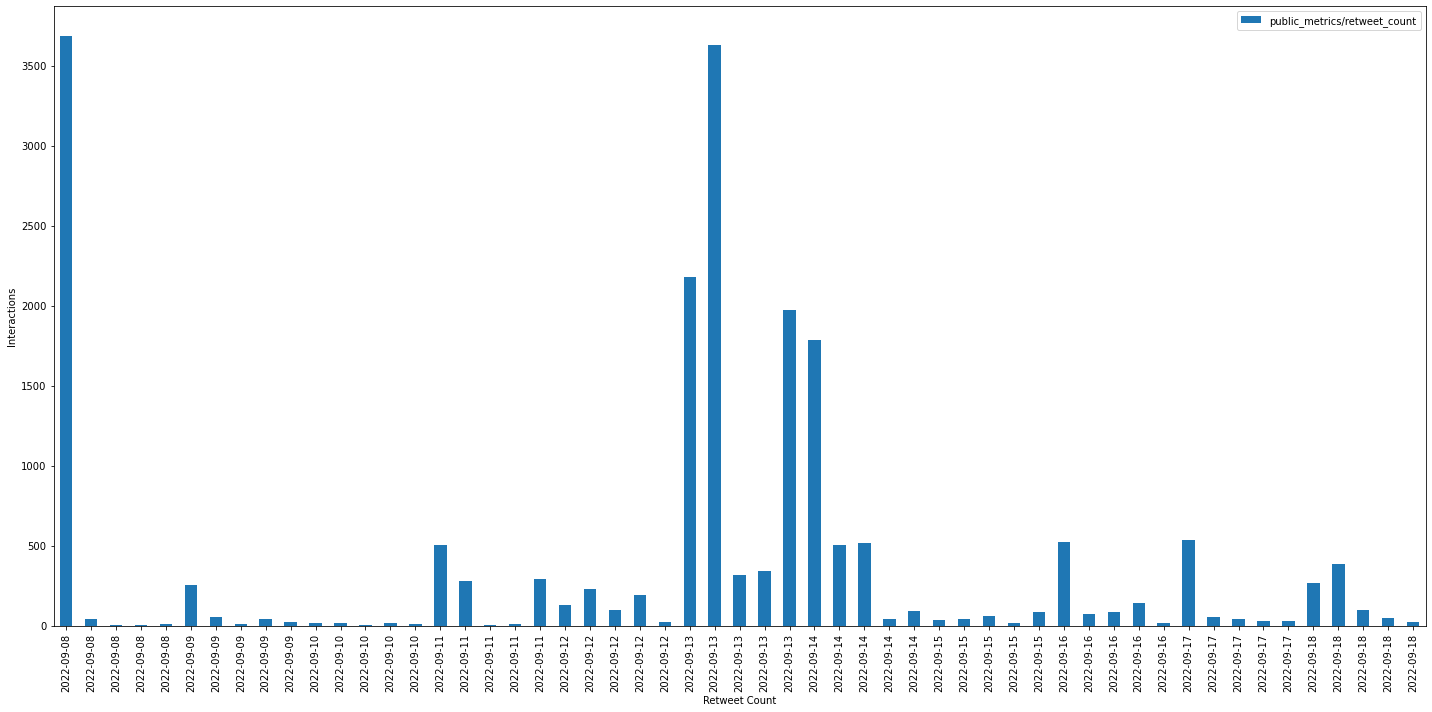

In [32]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

df.plot(kind='bar', x = 'created_at', y = 'public_metrics/retweet_count')
plt.ylabel('Interactions')
plt.xlabel("Retweet Count")


## Analyzing Trends

In the following four lineplots, I use Seaborn to analyze the overall trends of Twiter metrics for the hashtag #Zelda. There is a correlation between the Nintendo announcement of the new Zelda title on 9/13 and the number of metrics recorded.

[Text(0.5, 1.0, 'Retweets per Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Retweet Count')]

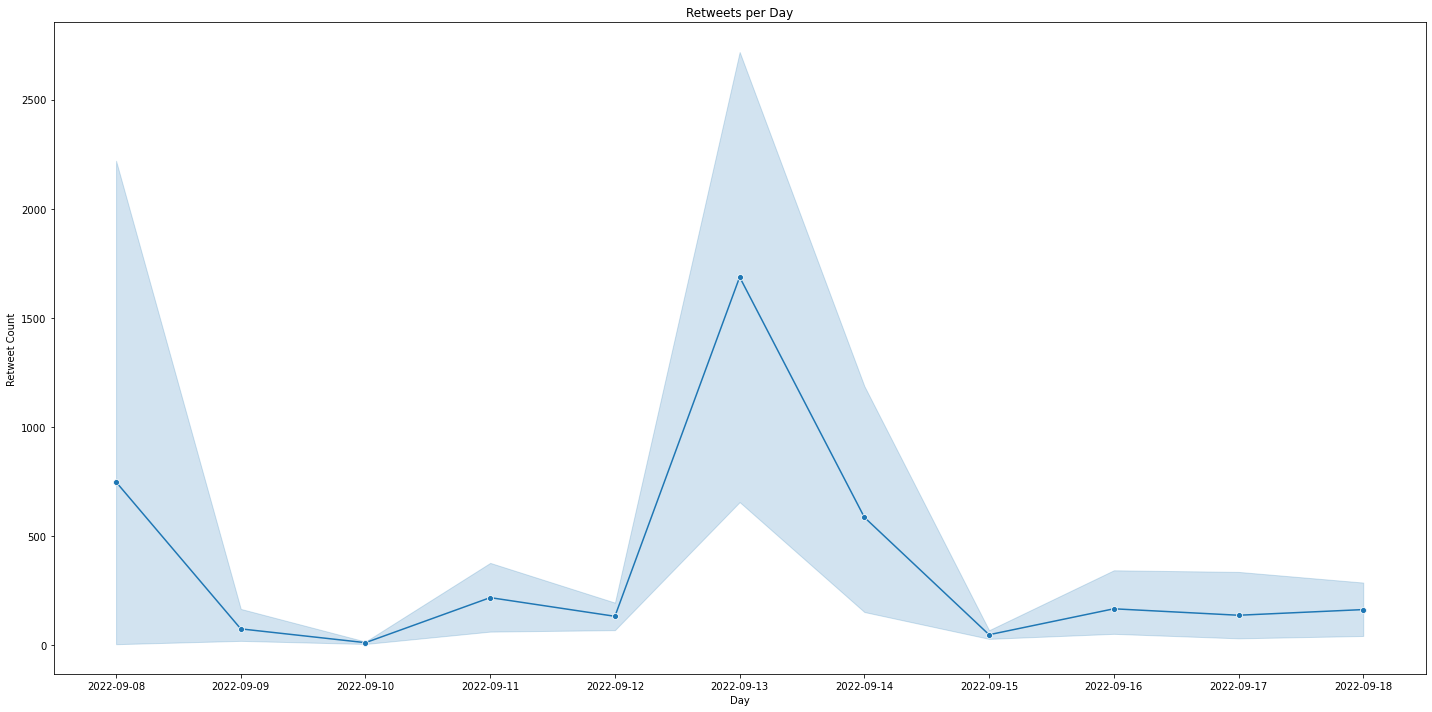

In [33]:
import seaborn
import pandas as pd

df = pd.read_csv('/Users/melaniehuynh/Downloads/zelda_search_data.csv')
res1 = seaborn.lineplot(data = df, x = "created_at", y = "public_metrics/retweet_count", marker = 'o')
res1.set(title='Retweets per Day', xlabel='Day', ylabel='Retweet Count')

[Text(0.5, 1.0, 'Replies per Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Reply Count')]

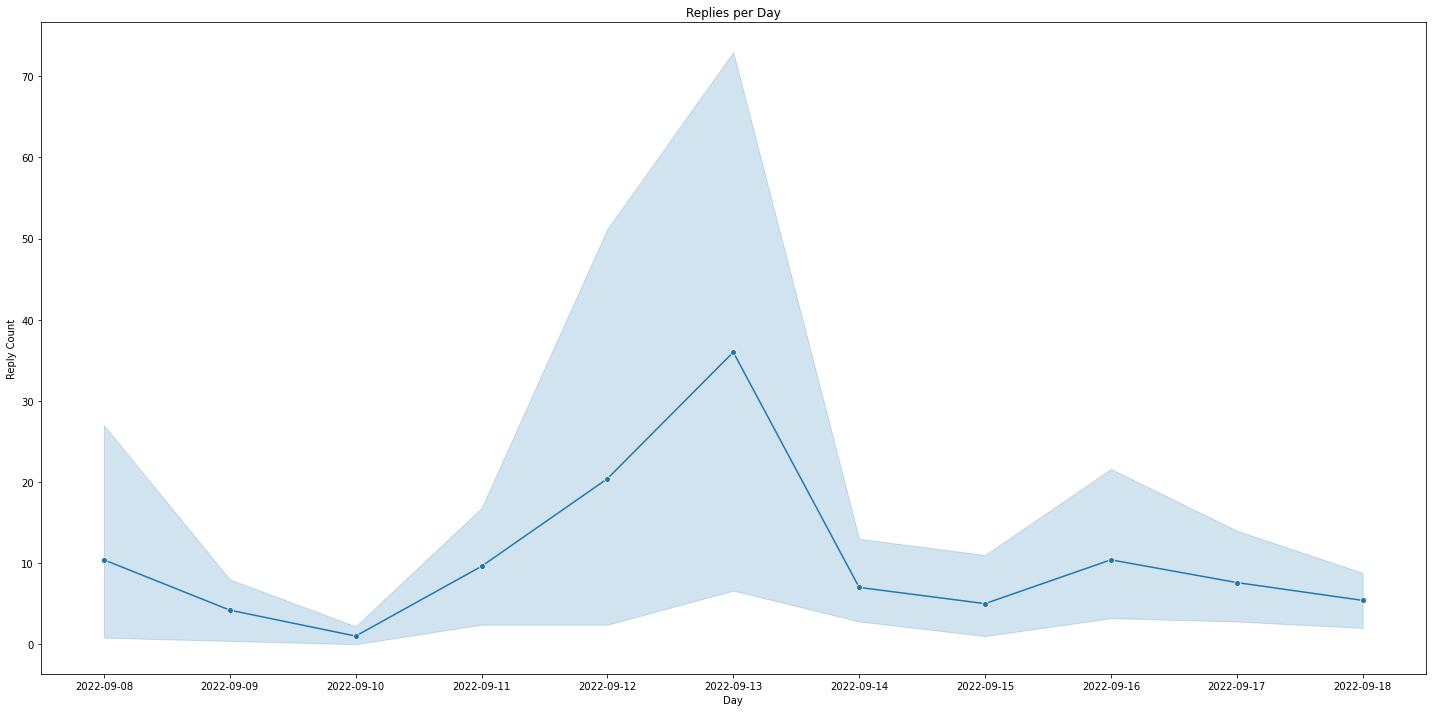

In [34]:
res2 = seaborn.lineplot(data = df, x = "created_at", y = "public_metrics/reply_count", marker = 'o')
res2.set(title='Replies per Day', xlabel='Day', ylabel='Reply Count')

[Text(0.5, 1.0, 'Likes per Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Like Count')]

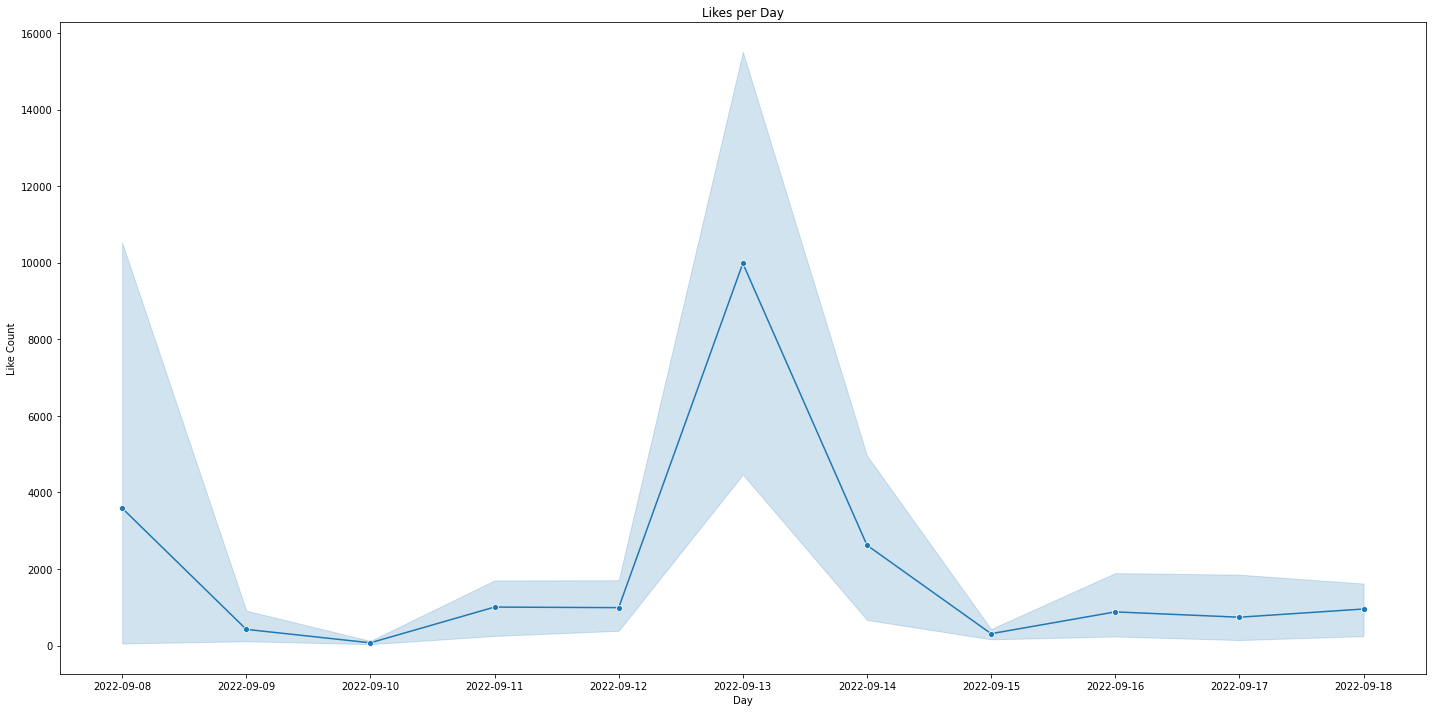

In [35]:
res3 = seaborn.lineplot(data = df, x = "created_at", y = "public_metrics/like_count", marker = 'o')
res3.set(title='Likes per Day', xlabel='Day', ylabel='Like Count')

[Text(0.5, 1.0, 'Quote Retweets per Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Quote Count')]

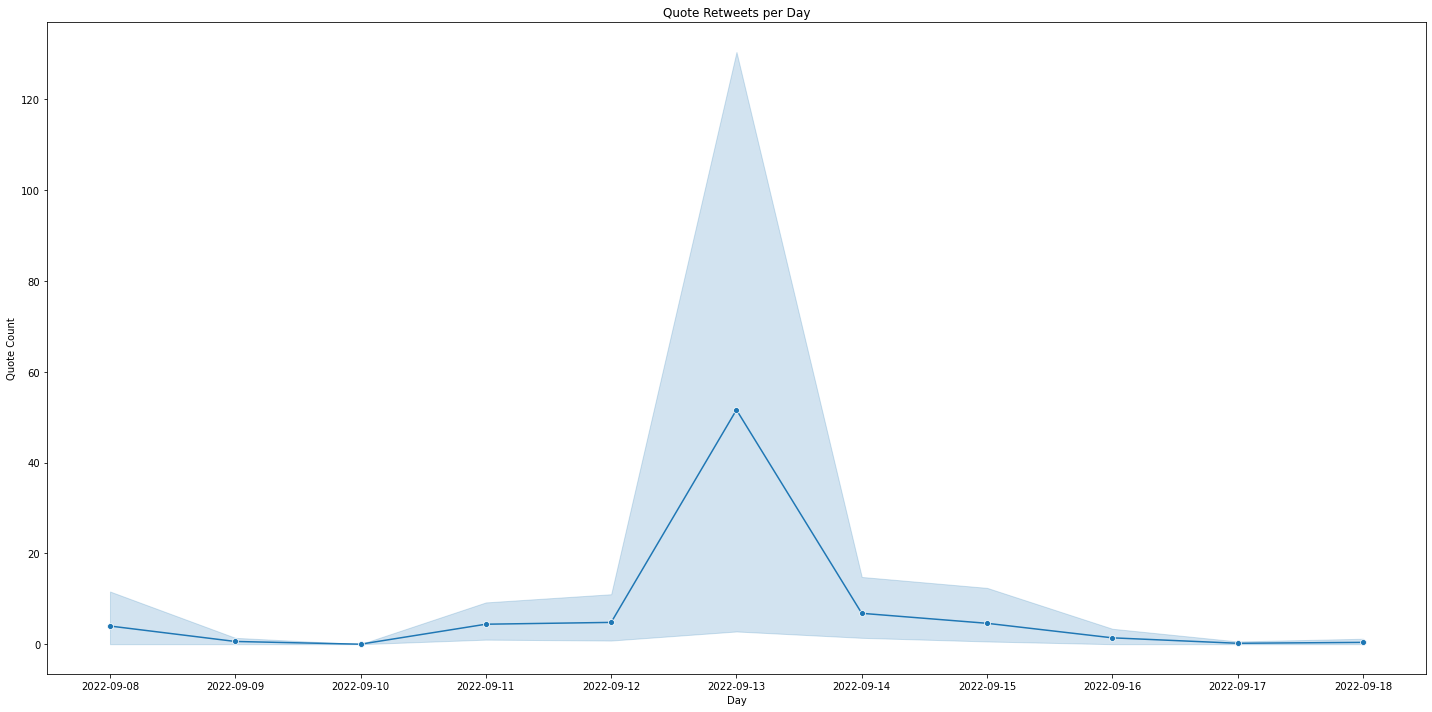

In [36]:
res4 = seaborn.lineplot(data = df, x = "created_at", y = "public_metrics/quote_count", marker = 'o')
res4.set(title='Quote Retweets per Day', xlabel='Day', ylabel='Quote Count')

[Text(0.5, 1.0, 'Retweets vs Likes'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Like and Retweet Count')]

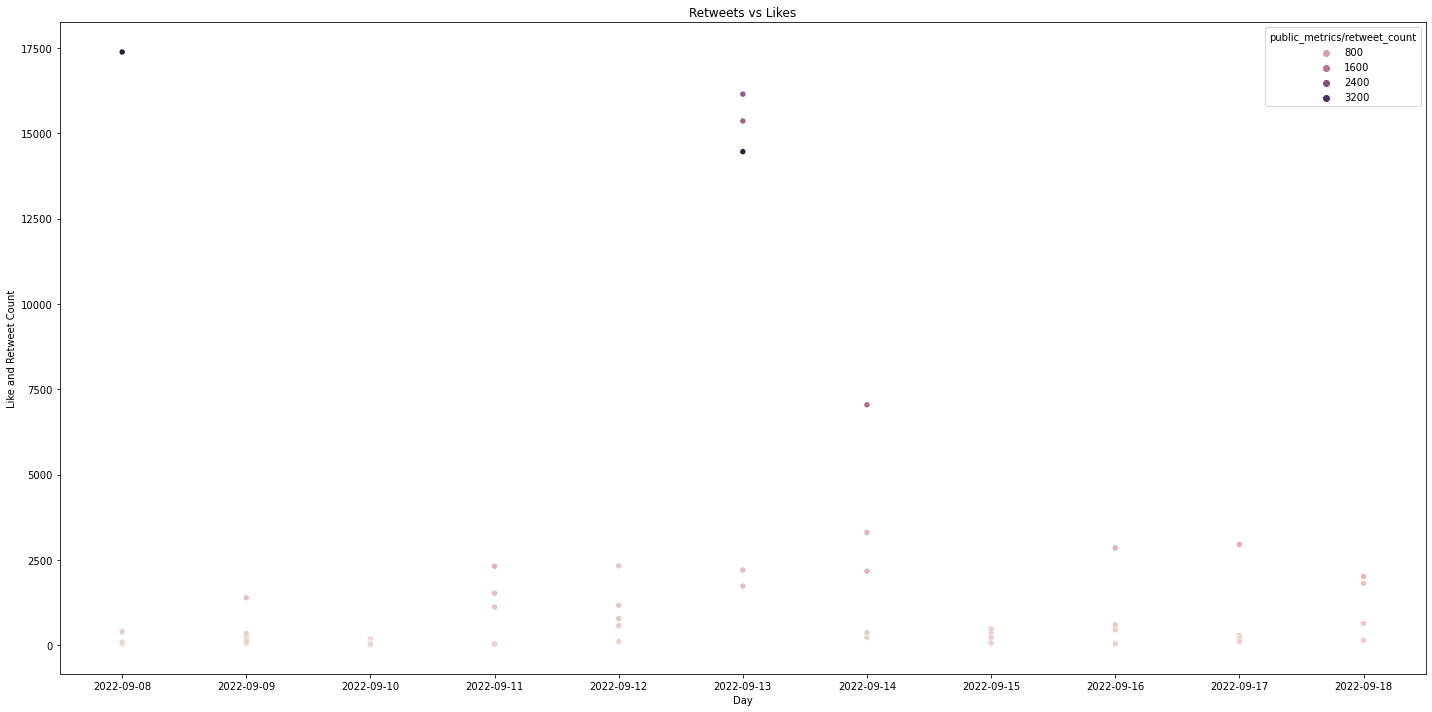

In [37]:
res5 = seaborn.scatterplot(data = df, x = "created_at", y = "public_metrics/like_count", hue = "public_metrics/retweet_count", marker = 'o')
res5.set(title='Retweets vs Likes', xlabel='Day', ylabel='Like and Retweet Count')

In this final visualization, I am combining the trends of all of the metrics (retweets, replies, likes, quote retweets) to show how the number of interactions on posts in the #Zelda hashrag spiked following the announcement of the new Zelda title.

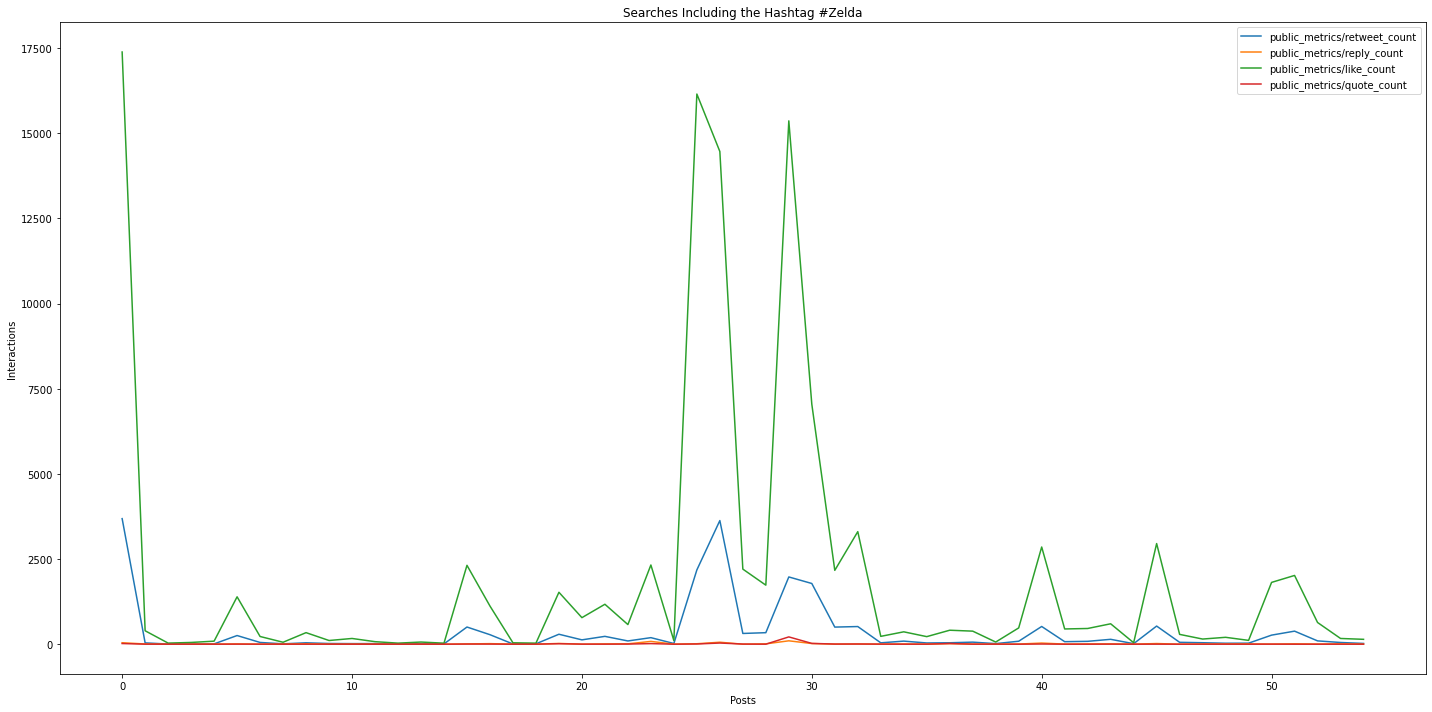

In [38]:
plt.rcParams["figure.autolayout"] = True
columns = ["public_metrics/like_count", "public_metrics/retweet_count","public_metrics/quote_count", "public_metrics/reply_count"]
df2 = pd.read_csv('/Users/melaniehuynh/Downloads/zelda_search_data.csv', usecols = columns)

df2.plot()
plt.ylabel('Interactions')
plt.xlabel("Posts")
plt.title("Searches Including the Hashtag #Zelda")
plt.show()